# Spotify data set
https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

a) This datast contains 20 features with the dependent variable being the genre of the music and there are 114000 samples. In the genre of music there are 114 unique genres of music. There are catigorical valiables such as explicit and mode that takes a binary value. Also there is time signaure that takes an integer from 1 to 5. 

In [20]:
# import relevant Python libraries
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from scipy import stats as stat
from sklearn import preprocessing as sklpp


In [21]:
df =pd.read_csv("Spotify_dataset.csv")
df.head()
#df.shape

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Pre-processing
step 1: get rid of any unwanted commlums in our case we got rid of track_id, artists, album_name, track_name, and Unnamed: 0. The reason we did this becuase these are string values that we can not use to predict the genre. We also chose to get rid of mode, time_signature and explicit since thses are not important to find genre.

step 2: instead of trying to distinguish between 114 genres we decided to trim the data set and only diferentiate between 5: acoustic, dance,k-pop, metal, and r-n-b. So we got rid of the rest of the data samples

step 3: Now that we have the samples of data we want we need to make sure that they can work with LDA and KNN inorder to do this we needed to label encode the genres of music using sklearn's preprocessing function. After this the data is ready to be used.

Feature extraction is not required for this data set since we are only appling LDA and KNN to it. Also we have already reduced the amount of features down to 13.

In [23]:
#Pre-processing
from sklearn import preprocessing
df =pd.read_csv("Spotify_dataset.csv")

df.drop(columns='track_id', inplace=True) # thses are the collums that we will not use for our data
df.drop(columns='artists', inplace=True)
df.drop(columns='album_name', inplace=True)
df.drop(columns='track_name', inplace=True)
df.drop(columns='Unnamed: 0', inplace=True)
df.drop(columns='mode', inplace=True)
df.drop(columns='time_signature', inplace=True)
df.drop(columns='explicit', inplace=True)


df = df[~(df["track_genre"].str.contains("acoustic|dance|k-pop|metal|r-n-b")) == False] # this removes all other track genres that we are not looking for 
df.drop(df.loc[df['track_genre'] == 'black-metal'].index, inplace=True)
df.drop(df.loc[df['track_genre'] == 'dancehall'].index, inplace=True)
df.drop(df.loc[df['track_genre'] == 'death-metal'].index, inplace=True)
df.drop(df.loc[df['track_genre'] == 'heavy-metal'].index, inplace=True)
df.drop(df.loc[df['track_genre'] == 'j-dance'].index, inplace=True)
df.drop(df.loc[df['track_genre'] == 'metalcore'].index, inplace=True)

label_encoder = preprocessing.LabelEncoder()
df['track_genre']= label_encoder.fit_transform(df['track_genre']) #these are the unique genres of music in Labeled encoding 





# Splitting the data
Here we are using the sklearn method train_test_split in order to split our data to get our test and training data.

In [24]:
from sklearn.model_selection import train_test_split
# Split the data into training, validation, and test sets
train_data, val_and_test_data = train_test_split(df, test_size=0.3)

# Split the validation and test sets further
val_data, test_data = train_test_split(val_and_test_data, test_size=0.5)

print(train_data.shape)  
print(val_data.shape)    
print(test_data.shape)  


(3500, 13)
(750, 13)
(750, 13)


#Model 1: LDA
Now finally we can use our machine learning method LDA. Here we are using sklearns LinearDiscriminantAnalysis to fit the model and predict the test data, as well as the confusion_matrix method to graph the confusion_matrix. Here we also do the Cross validation over 10 splits and get 0.6217.

cross validation:  0.6202857142857143


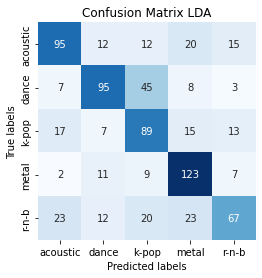

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Training data
X = train_data[['popularity','duration_ms','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
y = train_data['track_genre']
# Test data
X_test = test_data[['popularity','duration_ms','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

#Define method for CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

#evaluate CV and get mean score
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('cross validation: ', np.mean(scores))   

#predict which class the new observation belongs to
predictions_lda = model.predict(X_test)
actual_val = np.array(test_data.loc[:,"track_genre"])

# Graphing the confusion matrix
ax= plt.subplot()
conf_mat = confusion_matrix(actual_val, predictions_lda)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False,ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix LDA'); 
ax.xaxis.set_ticklabels(['acoustic', 'dance','k-pop','metal','r-n-b']); ax.yaxis.set_ticklabels(['acoustic', 'dance','k-pop','metal','r-n-b']);


#Model 2: KNN
Here we use sklearn's KNeighborsClassifier to fit the training data as well as predict the test data. Once again we also use the confusion_matrix method to graph the confusion_matrix.

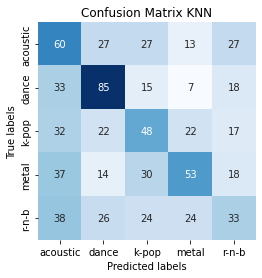

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

#training data
X = train_data[['popularity','duration_ms','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
y = train_data['track_genre']
# Testing data
X_test = test_data[['popularity','duration_ms','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

#defining KNN
knn = KNeighborsClassifier(n_neighbors = 5)
#fittting the data
knn.fit(X, y)
  
# Predict on dataset which model has not seen before X_test
predictions_knn = knn.predict(X_test)

# Graphing the confusion matrix
ax= plt.subplot()
conf_mat = confusion_matrix(actual_val, predictions_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False,ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix KNN'); 
ax.xaxis.set_ticklabels(['acoustic', 'dance','k-pop','metal','r-n-b']); ax.yaxis.set_ticklabels(['acoustic', 'dance','k-pop','metal','r-n-b']);


#Comparative analysis
As can be see by the confusion matrix lda is better at predicting the genres of music more than KNN. This is because in the lda confusion matrix you can see that the diagonal line is much more prominent. The KNN confusion matrix is only able to predict dance reliably the other genres of music it is not able to predecit well. Because of this I would use lda over knn for predicting genres of music.

#Ethical Issues
This machine model has some slight ethical concerns when prdeicting the genres of music. Even though majority of the time the song is predicted correctly there are still times that the genre is wrongly classified. bias, as machine learning systems can perpetuate and amplify existing biases in the data they are trained on. This could lead to unfair or inaccurate predictions that disproportionately harm certain groups of musicians or music listeners. Because of this anyone who uses this machine learning model need to know that the prediction is not always correct.

# Bibliography
[1] [LDA](https://www.statology.org/linear-discriminant-analysis-in-python/)

[2] [KNN](https://realpython.com/knn-python/)

[3][Confussion matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.)
